In [32]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot as plot

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 27s 2us/step


# Analysing IMDB data

In [11]:
np.unique(X_train)

array([ list([1, 4, 20, 5, 116, 26, 24, 78, 5, 3066, 15392, 127, 6, 52, 292, 395, 61398, 22470, 21, 4, 20, 7729, 45, 1408, 8, 30, 6, 4857, 8, 6, 569, 20, 4, 1188, 7, 14, 4857, 695, 122, 24, 106, 4, 204, 9636, 96, 42, 33, 222, 122, 24, 459, 44, 2386, 14, 20, 9, 6, 4857, 63, 817, 4, 204, 20, 47, 460, 2984, 46, 49, 479, 18, 178, 5, 14, 20, 144, 130, 121, 4, 204, 778, 42, 33, 222, 485, 56, 8, 12, 24, 31, 7, 9636, 491, 154, 369, 39, 4, 204, 97, 35, 1267, 11, 14, 20, 507, 24, 60, 1046, 6045, 11741, 39394, 11, 4, 204, 9, 11, 4, 20, 21, 29, 299, 6, 340, 275, 109, 4, 204, 304, 273, 11, 6592, 5, 4, 4857, 304, 273, 11, 5554, 4609, 1069, 14, 20, 304, 273, 329, 74, 457, 153, 908, 586, 25, 104, 31, 7, 9636, 196, 58, 369, 62, 97, 35, 1267, 11, 4, 204, 9795, 39346, 46, 112, 626, 39, 2829, 103, 3427, 457, 153, 11, 2829, 198, 64, 6, 171, 26337, 200, 4, 130, 7, 4, 4857, 5, 4, 380, 7, 4, 204, 2394, 1361, 75, 124, 39, 4, 454, 7, 4, 204, 9795, 47, 1084, 457, 153, 11, 1172, 38, 54, 4, 4857, 408, 178, 14, 363

In [13]:
X_train.shape

(25000,)

In [14]:
y_train.shape

(25000,)

# Concatenate data

In [18]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [19]:
print(X.shape)
print(y.shape)

(50000,)
(50000,)


# Checking number of classes

In [24]:
unique_classes = np.unique(y)
print('Number of classes are', len(unique_classes))
print(np.unique(y))

('Number of classes are', 2)
[0 1]


# Finding number of words

In [25]:
print(len(np.unique(np.hstack(X))))

88585


In [30]:
result = [len(x) for x in X]
message = 'Mean {} words {}'.format(
    np.mean(result),
    np.std(result)
)
print(message)

Mean 234.75892 words 172.911494587


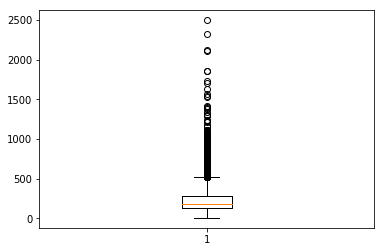

In [33]:
plot.boxplot(result)
plot.show()

# Simple Multi-Layer perceptron model for IMDB dataset

In [36]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [37]:
seed = 7
np.random.seed(seed)

In [38]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [39]:
X_train.shape

(25000,)

In [41]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# Model construction

In [42]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 23s - loss: 0.5119 - acc: 0.7085 - val_loss: 0.3429 - val_acc: 0.8498
Epoch 2/2
